In [5]:
import os, sys, glob
# import omero_rois
# cellRoids = omero_rois.masks_from_label_image(slide)
## Does not work with Ezomero...more for imageJ
import ezomero
from pprint import pprint
import configparser
from pathlib import Path

import matplotlib.pyplot as plt

import cv2
print("OpenCV v", cv2.__version__)
import numpy as np
print("Numpy v", np.__version__)
import pandas as pd
print("Pandas v", pd.__version__)

OpenCV v 4.6.0
Numpy v 1.22.4
Pandas v 1.5.3


In [ ]:
base=r"I:\SegmentationResults"
labelMask = glob.glob(os.path.join(base,"*Mask.tiff"))[0]

In [97]:
slide = cv2.imread(labelMask,-1)
print(f"    Dimensions: {slide.shape}")
print("     Single Max :"+str(np.max(slide)))
print("     Single Min :"+str(np.min(slide)))

    Dimensions: (27673, 30673)
     Single Max :945386
     Single Min :0


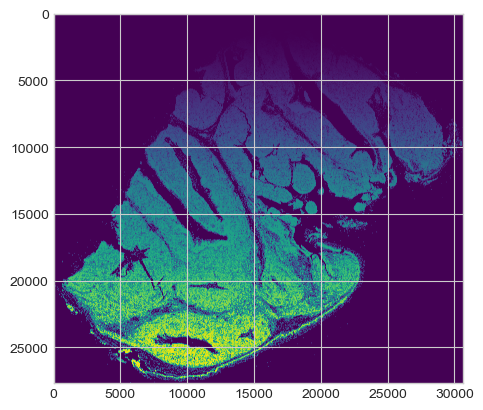

In [98]:
fig, ax = plt.subplots()
plt.imshow(slide, cmap="viridis")

In [99]:
topMx = np.max(slide)+1
print("Last Label:"+str(topMx))

Last Label:945387


In [ ]:
arrayShapes=[]
for i in range(1, topMx):
    if i % 5000:
        print("Progress: "+str(np.round(i / topMx, decimals=4) ))
    slide2 = (slide == i).astype(np.uint8)
    contours, hierarchy = cv2.findContours(slide2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    lst=contours[0].swapaxes(1,0)
    lst2=[tuple(e) for e in lst[0]]
    arrayShapes.append( ezomero.rois.Polygon(lst2, label=i) )

In [92]:
home = str(Path.home())
config = configparser.RawConfigParser()
config.read(r'{}\Documents\myKeyVariables.cfg'.format(home))   
envVars = dict(config.items('OMERO'))

# Settings for OMERO
user = envVars['user']
password = envVars['pass']
host = envVars['url']
port = 4064 #4080
secure = True #False

#lab="AkoyaFusion_Development" BIC_Developments
conn = ezomero.connect(user, password, 'AkoyaFusion_Development', host=host, port=port, secure=secure)

ezomero.print_projects(conn)

Projects:
	Nolan_lab:	465
	test_overrides:	551
	Tonsil_pilot:	608
	req34442_20230811:	812
	req34437_20230811:	813
	20230804_CC:	814
	20230726_PG:	815
	20230717_EM:	816
	20230712_PG:	817
	20230710_Lutgens:	818
	20230710_AL:	819
	OVTMA_InCell_Test:	860


In [93]:
ezomero.print_datasets(conn, project=860) 

imgs = ezomero.get_image_ids(conn, dataset=512)
pprint(imgs)

Datasets in Project "OVTMA_InCell_Test":
	OME_TIFF_Images:	512
[4669]


In [94]:
im=imgs[0]
imgDesc, pix = ezomero.get_image(conn, im, xyzct=False, no_pixels=True)
#print(imgDesc.getName(),imgDesc.getROICount())
imgPointsIDs = ezomero.get_roi_ids(conn, im)
imName = imgDesc.getName().replace('\\.ome\\.tiff','')
print("{} has {} ROIs".format(imName, len(imgPointsIDs)))

OVCA_TMA22_region_013.ome.tiff has 0 ROIs


In [95]:
ezomero.post_roi(conn, im, arrayShapes)

50266

In [80]:
#"".join("".join([str(x), ',', str(y), ', ']) for x, y in shape.points)[:-2]
arrayShapes[0].points

array([[[725, 106],
        [724, 107],
        [721, 107],
        [721, 108],
        [719, 110],
        [718, 110],
        [717, 111],
        [717, 117],
        [718, 118],
        [721, 118],
        [722, 119],
        [722, 120],
        [727, 120],
        [727, 119],
        [729, 117],
        [731, 117],
        [732, 116],
        [732, 115],
        [733, 114],
        [734, 114],
        [734, 109],
        [733, 109],
        [732, 108],
        [732, 107],
        [731, 106]]], dtype=int32)